In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import sys
sys.path.append('../..')
from utils.workflow import WorkflowModel
from utils.data import RK4DataGenerator

2025-12-06 19:49:01.305690: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
Using backend: tensorflow
Other supported backends: tensorflow.compat.v1, pytorch, jax, paddle.
paddle supports more examples now and is recommended.
Enable just-in-time compilation with XLA.



Set the default float type to float64


In [2]:
df = pd.read_csv("../../data/influenza_england_1978_school.csv")
df.shape

(14, 3)

In [3]:
I_data = df["in_bed"].to_numpy()

def double_data(data):
    avg_arr = ((data + np.roll(data, -1))/2.0)
    return np.vstack([data, avg_arr]).flatten('F')[:-1]

I_data = double_data(double_data(double_data(I_data)))
I_data

array([  3.   ,   3.625,   4.25 ,   4.875,   5.5  ,   6.125,   6.75 ,
         7.375,   8.   ,  10.25 ,  12.5  ,  14.75 ,  17.   ,  19.25 ,
        21.5  ,  23.75 ,  26.   ,  32.25 ,  38.5  ,  44.75 ,  51.   ,
        57.25 ,  63.5  ,  69.75 ,  76.   ,  94.625, 113.25 , 131.875,
       150.5  , 169.125, 187.75 , 206.375, 225.   , 234.125, 243.25 ,
       252.375, 261.5  , 270.625, 279.75 , 288.875, 298.   , 293.   ,
       288.   , 283.   , 278.   , 273.   , 268.   , 263.   , 258.   ,
       254.875, 251.75 , 248.625, 245.5  , 242.375, 239.25 , 236.125,
       233.   , 227.5  , 222.   , 216.5  , 211.   , 205.5  , 200.   ,
       194.5  , 189.   , 181.375, 173.75 , 166.125, 158.5  , 150.875,
       143.25 , 135.625, 128.   , 120.5  , 113.   , 105.5  ,  98.   ,
        90.5  ,  83.   ,  75.5  ,  68.   ,  63.125,  58.25 ,  53.375,
        48.5  ,  43.625,  38.75 ,  33.875,  29.   ,  27.125,  25.25 ,
        23.375,  21.5  ,  19.625,  17.75 ,  15.875,  14.   ,  12.75 ,
        11.5  ,  10.

In [4]:
# beta_t = lambda x: 0.85 * x
# rk4data = RK4DataGenerator(beta_t, 0.447, 0, 13)
# I_data = rk4data.generate(nop=50, noise_std=0.1)[:,1] * 763

In [5]:
I_data

array([  3.   ,   3.625,   4.25 ,   4.875,   5.5  ,   6.125,   6.75 ,
         7.375,   8.   ,  10.25 ,  12.5  ,  14.75 ,  17.   ,  19.25 ,
        21.5  ,  23.75 ,  26.   ,  32.25 ,  38.5  ,  44.75 ,  51.   ,
        57.25 ,  63.5  ,  69.75 ,  76.   ,  94.625, 113.25 , 131.875,
       150.5  , 169.125, 187.75 , 206.375, 225.   , 234.125, 243.25 ,
       252.375, 261.5  , 270.625, 279.75 , 288.875, 298.   , 293.   ,
       288.   , 283.   , 278.   , 273.   , 268.   , 263.   , 258.   ,
       254.875, 251.75 , 248.625, 245.5  , 242.375, 239.25 , 236.125,
       233.   , 227.5  , 222.   , 216.5  , 211.   , 205.5  , 200.   ,
       194.5  , 189.   , 181.375, 173.75 , 166.125, 158.5  , 150.875,
       143.25 , 135.625, 128.   , 120.5  , 113.   , 105.5  ,  98.   ,
        90.5  ,  83.   ,  75.5  ,  68.   ,  63.125,  58.25 ,  53.375,
        48.5  ,  43.625,  38.75 ,  33.875,  29.   ,  27.125,  25.25 ,
        23.375,  21.5  ,  19.625,  17.75 ,  15.875,  14.   ,  12.75 ,
        11.5  ,  10.

In [6]:
t_0, t_f = 0, 13
N = 763
gamma = 0.447
train_t = np.linspace(t_0, t_f, len(I_data))
model = WorkflowModel(t_0, t_f, I_data, train_t, N, gamma)

2025-12-06 19:49:03.943447: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:47] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
I0000 00:00:1765061343.944172   52301 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2578 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1650, pci bus id: 0000:01:00.0, compute capability: 7.5


Compiling model...
'compile' took 0.003544 s



In [7]:
model.train()

Training model...



2025-12-06 19:49:06.542089: I external/local_xla/xla/service/service.cc:163] XLA service 0x560ddb1f4f10 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-12-06 19:49:06.542107: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2025-12-06 19:49:06.593964: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-12-06 19:49:06.772684: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91002
I0000 00:00:1765061348.349551   52301 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


Step      Train loss                                                                                    Test loss                                                                                     Test metric
0         [1.11e-02, 5.94e-02, 5.09e-02, 5.25e+00, 6.64e+00, 0.00e+00, 1.03e-04, 7.42e-01, 1.46e-06]    [7.17e-03, 5.20e-02, 4.55e-02, 5.21e+00, 6.64e+00, 0.00e+00, 1.03e-04, 7.48e-01, 1.46e-06]    []  
100       [6.02e-03, 6.85e-03, 1.49e-02, 2.87e-03, 1.75e-04, 5.67e-04, 3.27e-05, 1.33e-01, 1.49e-06]    [5.80e-03, 4.77e-03, 1.43e-02, 7.09e-04, 4.67e-05, 5.31e-04, 6.08e-05, 1.32e-01, 1.49e-06]    []  
200       [5.84e-03, 5.73e-03, 1.39e-02, 1.13e-03, 1.48e-05, 6.22e-04, 2.54e-05, 1.33e-01, 1.49e-06]    [5.79e-03, 4.32e-03, 1.37e-02, 3.83e-04, 8.85e-05, 5.88e-04, 3.34e-05, 1.32e-01, 1.49e-06]    []  
300       [6.82e-03, 5.61e-03, 1.51e-02, 2.76e-03, 1.75e-03, 1.18e-03, 6.24e-06, 1.30e-01, 1.49e-06]    [6.44e-03, 4.38e-03, 1.47e-02, 7.06e-04, 3.32e-04, 1.14e-03, 3.12e-06, 1.29e-

(<deepxde.model.LossHistory at 0x7f354c337d90>,
 <deepxde.model.TrainState at 0x7f35560aff90>)

In [8]:
test_t = np.linspace(t_0, t_f, 50)
pred = model.predict(test_t)


In [9]:
I_data

array([  3.   ,   3.625,   4.25 ,   4.875,   5.5  ,   6.125,   6.75 ,
         7.375,   8.   ,  10.25 ,  12.5  ,  14.75 ,  17.   ,  19.25 ,
        21.5  ,  23.75 ,  26.   ,  32.25 ,  38.5  ,  44.75 ,  51.   ,
        57.25 ,  63.5  ,  69.75 ,  76.   ,  94.625, 113.25 , 131.875,
       150.5  , 169.125, 187.75 , 206.375, 225.   , 234.125, 243.25 ,
       252.375, 261.5  , 270.625, 279.75 , 288.875, 298.   , 293.   ,
       288.   , 283.   , 278.   , 273.   , 268.   , 263.   , 258.   ,
       254.875, 251.75 , 248.625, 245.5  , 242.375, 239.25 , 236.125,
       233.   , 227.5  , 222.   , 216.5  , 211.   , 205.5  , 200.   ,
       194.5  , 189.   , 181.375, 173.75 , 166.125, 158.5  , 150.875,
       143.25 , 135.625, 128.   , 120.5  , 113.   , 105.5  ,  98.   ,
        90.5  ,  83.   ,  75.5  ,  68.   ,  63.125,  58.25 ,  53.375,
        48.5  ,  43.625,  38.75 ,  33.875,  29.   ,  27.125,  25.25 ,
        23.375,  21.5  ,  19.625,  17.75 ,  15.875,  14.   ,  12.75 ,
        11.5  ,  10.

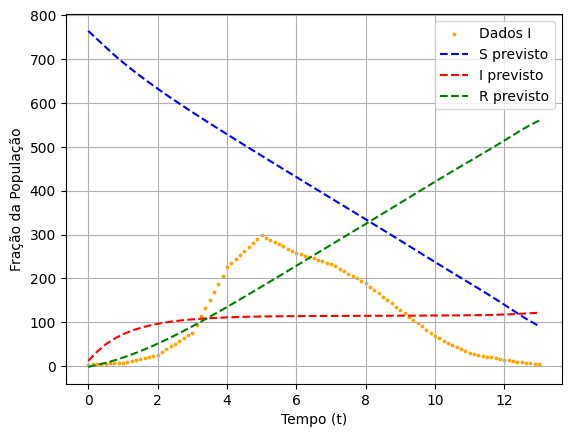

In [10]:
S_pred = pred[:,0]
I_pred = pred[:,1]
R_pred = pred[:,2]

plt.scatter(train_t, I_data, label="Dados I", color="orange", s=3)

plt.plot(test_t, S_pred, label="S previsto", linestyle="--", color="blue")
plt.plot(test_t, I_pred, label="I previsto", linestyle="--", color="red")
plt.plot(test_t, R_pred, label="R previsto", linestyle="--", color="green")

plt.xlabel("Tempo (t)")
plt.ylabel("Fração da População")

plt.legend()
plt.grid()

plt.show()

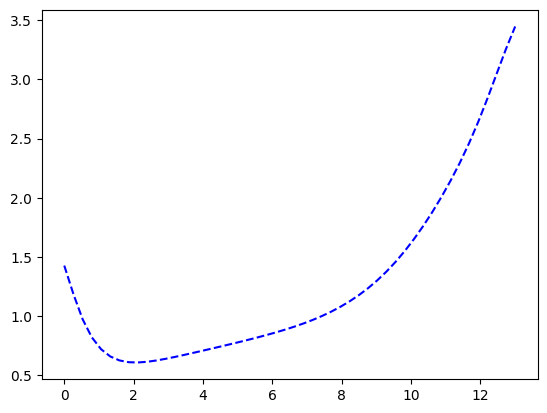

In [11]:
beta_pred = pred[:,3]
plt.plot(test_t, beta_pred, label="Beta previsto", linestyle="--", color="blue")
# plt.plot(test_t, beta_t(test_t), label="Beta", linestyle="--", color="red")
plt.show()